# Classification

# Decision Tree

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Download from tinyurl.com/decisiontree-data

from io import StringIO
dataset =StringIO('''Plays Fetch,Is grumpy,Favorite food,Species
Yes,No,Bacon,Dog
No,Yes,Dog Food,Dog
No,Yes,Cat food,Cat
No,Yes,Bacon,Cat
No,No,Cat food,Cat
No,Yes,Bacon,Cat
No,Yes,Cat food,Cat
No,No,Dog Food,Dog
No,Yes,Cat food,Cat
Yes,No,Dog Food,Dog
Yes,No,Bacon,Dog
No,No,Cat food,Cat
Yes,Yes,Cat food,Cat
Yes,Yes,Bacon,Dog
''')
df = pd.read_csv(dataset)
df

Plays Fetch Is grumpy Favorite food Species
0          Yes        No         Bacon     Dog
1           No       Yes      Dog Food     Dog
2           No       Yes      Cat food     Cat
3           No       Yes         Bacon     Cat
4           No        No      Cat food     Cat
5           No       Yes         Bacon     Cat
6           No       Yes      Cat food     Cat
7           No        No      Dog Food     Dog
8           No       Yes      Cat food     Cat
9          Yes        No      Dog Food     Dog
10         Yes        No         Bacon     Dog
11          No        No      Cat food     Cat
12         Yes       Yes      Cat food     Cat
13         Yes       Yes         Bacon     Dog

In [3]:
df['B Plays Fetch'] = df['Plays Fetch'].apply(lambda x: x=='Yes')
df['B Is grumpy'] = df['Is grumpy'].apply(lambda x: x=='Yes')
df['B Favorite food'] = [(0 if food == 'Bacon' else 1 if food == 'Dog Food' else 2) 
                         for food in df['Favorite food']]
df

Plays Fetch Is grumpy Favorite food Species  B Plays Fetch  B Is grumpy  \
0          Yes        No         Bacon     Dog           True        False   
1           No       Yes      Dog Food     Dog          False         True   
2           No       Yes      Cat food     Cat          False         True   
3           No       Yes         Bacon     Cat          False         True   
4           No        No      Cat food     Cat          False        False   
5           No       Yes         Bacon     Cat          False         True   
6           No       Yes      Cat food     Cat          False         True   
7           No        No      Dog Food     Dog          False        False   
8           No       Yes      Cat food     Cat          False         True   
9          Yes        No      Dog Food     Dog           True        False   
10         Yes        No         Bacon     Dog           True        False   
11          No        No      Cat food     Cat          False        False   
12         Yes       Yes      Cat food     Cat           True         True   
13         Yes       Yes         Bacon     Dog           True         True   

    B Favorite food  
0                 0  
1                 1  
2                 2  
3                 0  
4                 2  
5                 0  
6                 2  
7                 1  
8                 2  
9                 1  
10                0  
11                2  
12                2  
13                0

In [4]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(criterion = 'entropy', max_depth =4)
obtained_tree= decisiontree.fit(df[['B Plays Fetch' , 'B Is grumpy', 'B Favorite food']],df['Species'])


In [5]:
print("Extracted Classes" , decisiontree.classes_)

Extracted Classes ['Cat' 'Dog']


In [6]:
print(obtained_tree.predict([[True,False,0]]))
print(obtained_tree.predict([[False,True,2],[True,False,0]]))

['Dog']
['Cat' 'Dog']


In [7]:
#predicted output
predictions = obtained_tree.predict(df[['B Plays Fetch', 'B Is grumpy','B Favorite food']])
print(predictions.tolist())
#actual output
print(df['Species'].tolist())

['Dog', 'Dog', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Dog', 'Cat', 'Dog', 'Dog', 'Cat', 'Cat', 'Dog']
['Dog', 'Dog', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Dog', 'Cat', 'Dog', 'Dog', 'Cat', 'Cat', 'Dog']


In [10]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(df['Species'],predictions))

[[8 0]
 [0 6]]


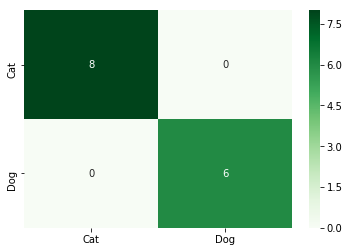

In [11]:
#pip install seaborn
import seaborn
seaborn.heatmap(confusion_matrix(df['Species'],predictions),annot=True,cmap='Greens',
               xticklabels=decisiontree.classes_,
               yticklabels=decisiontree.classes_)

In [12]:
print(classification_report(df['Species'],predictions))

              precision    recall  f1-score   support

         Cat       1.00      1.00      1.00         8
         Dog       1.00      1.00      1.00         6

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



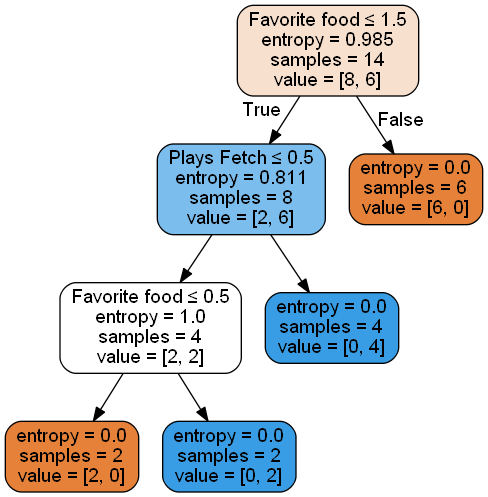

In [13]:
#graphviz
# pip install pydotplus

import os
os.environ['PATH']+=os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin' 

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
 
DecisionTreeImg = StringIO()
export_graphviz(obtained_tree,out_file=DecisionTreeImg,
               filled=True,rounded=True,
               feature_names=["Plays Fetch","Is grumpy","Favorite food"],
               special_characters= True)

graph= pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())